<a href="https://colab.research.google.com/github/SJeevitha007/Random_Forest_Assignment16/blob/main/Random_Forest_Assignment16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

**Importing the dataset**

In [4]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [5]:
x=df[["Age","EstimatedSalary"]].values
y=df["Purchased"].values

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

**Feature Scaling**

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

**Fitting Random Forest to the Training set**

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
rf=RandomForestClassifier()
clf=GridSearchCV(estimator=rf,param_grid={"n_estimators":[100,110,150,200],"criterion":["gini","entropy"]},cv=skf)
clf.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 110, 150, 200]})

In [10]:
clf.best_params_

{'criterion': 'gini', 'n_estimators': 200}

In [18]:
rf=RandomForestClassifier(criterion='gini',n_estimators=200)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(x, y):
    x_train, x_test= x[train_index], x[test_index]
    y_train, y_test= y[train_index], y[test_index]
    scaler=StandardScaler()
    x_train=scaler.fit_transform(x_train)
    x_test=scaler.fit_transform(x_test)
    rf.fit(x_train, y_train)
    lst_accu_stratified.append(rf.score(x_test, y_test))

In [20]:
np.array(lst_accu_stratified).mean()

0.875

**Predicting the Test set results**

In [21]:
y_pred=rf.predict(x_test)

**Making the Confusion Matrix**

<AxesSubplot:>

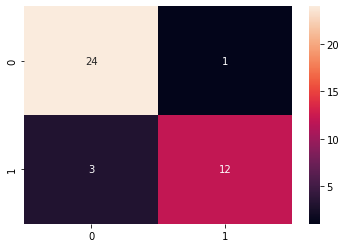

In [22]:
from sklearn.metrics import accuracy_score,classification_report,plot_roc_curve,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [23]:
accuracy_score(y_test,y_pred)

0.9

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        25
           1       0.92      0.80      0.86        15

    accuracy                           0.90        40
   macro avg       0.91      0.88      0.89        40
weighted avg       0.90      0.90      0.90        40



**Visualising the Training set results**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


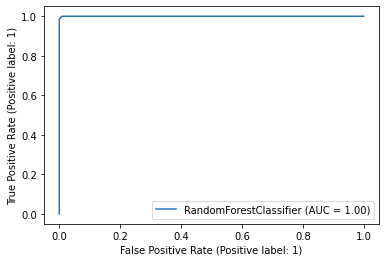

In [28]:
plot_roc_curve(rf,x_train,y_train)

**Visualising the Test set results**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


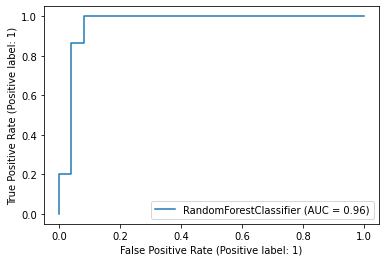

In [30]:
plot_roc_curve(rf,x_test,y_test)